In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Basic Info
print(df.shape)
print(df.info())
df.describe()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

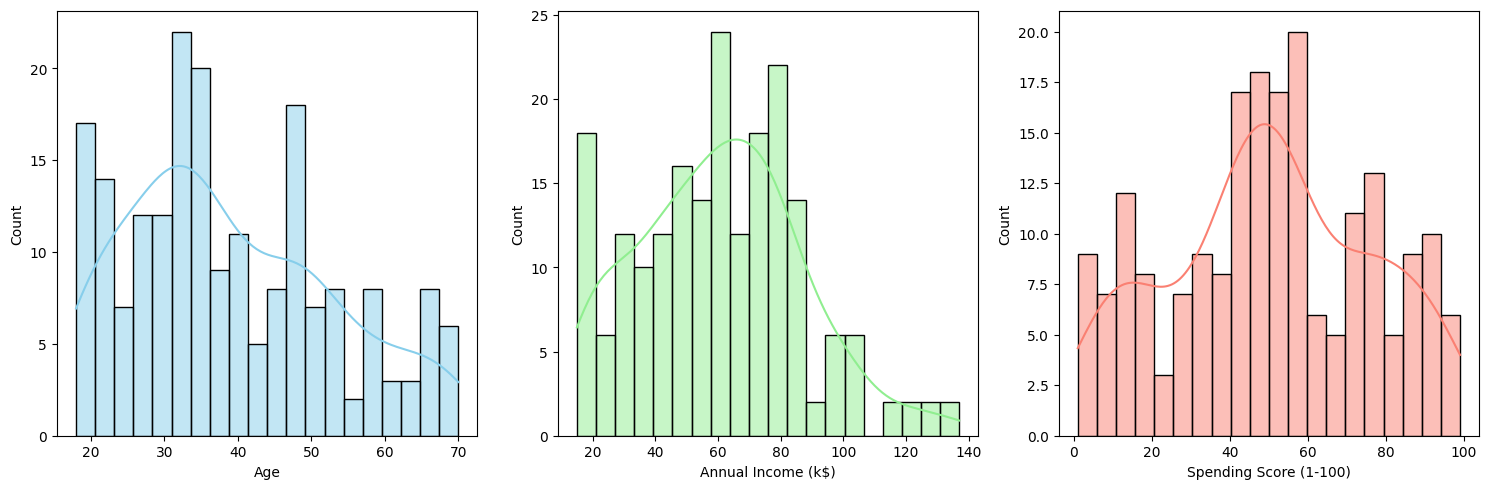

In [5]:
# ## Exploratory Data Analysis (EDA)

# %% [code]
# Distribution of Age, Income, and Spending Score
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0], color="skyblue")
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, ax=axes[1], color="lightgreen")
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, ax=axes[2], color="salmon")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14204\3727503151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel")


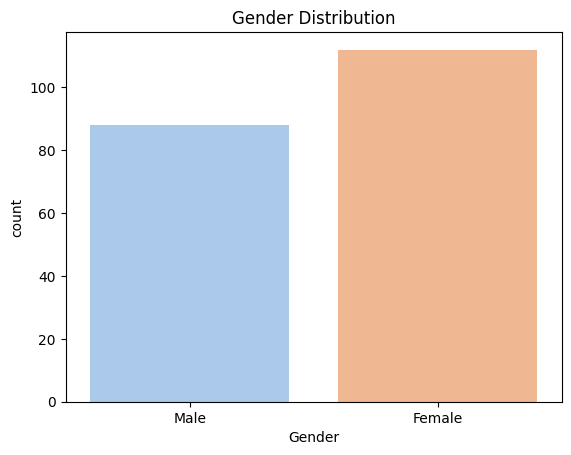

In [25]:
# Gender distribution
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.show()

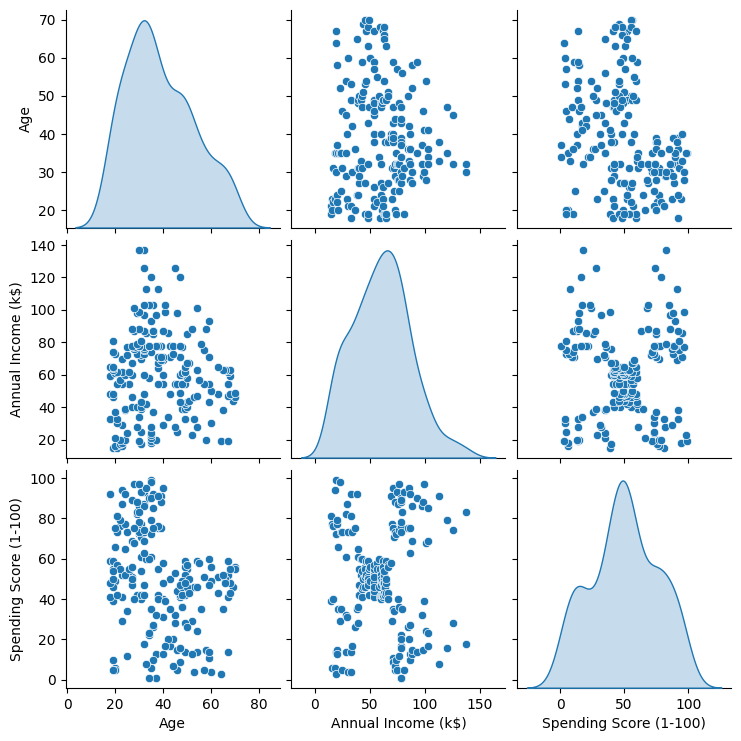

In [6]:
# Pairplot of selected features
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]], diag_kind="kde")
plt.show()

In [9]:
# Select features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

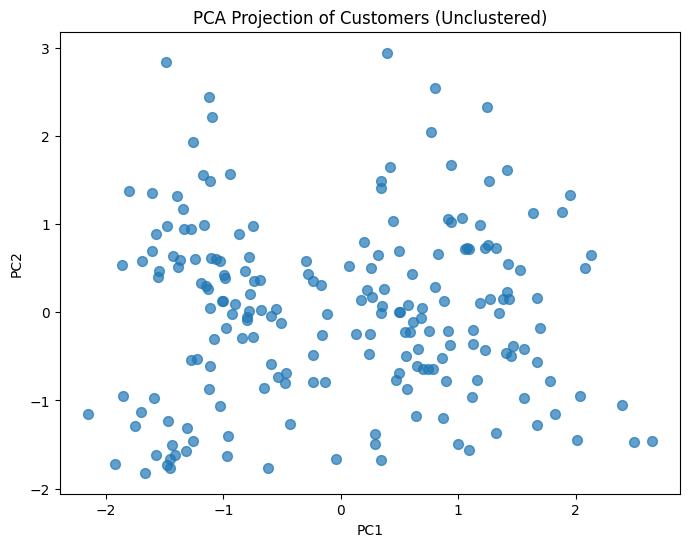

In [11]:
# ## 2D Visualization with PCA

# %% [code]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=50, alpha=0.7)
plt.title("PCA Projection of Customers (Unclustered)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

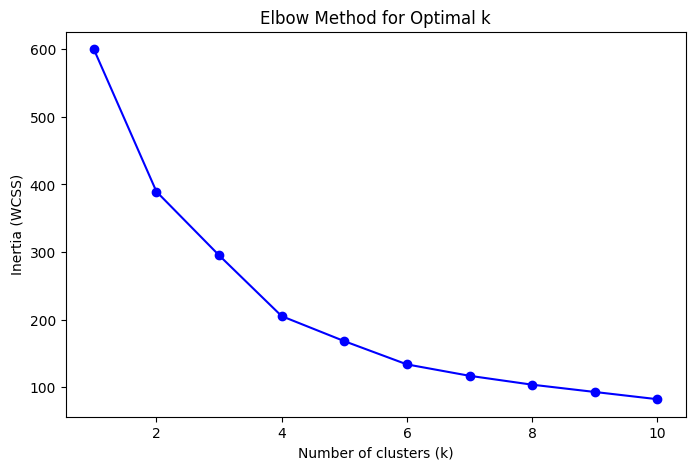

In [14]:
# ## Finding Optimal Number of Clusters (Elbow Method)

# %% [code]
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

k=2, Silhouette Score=0.3355
k=3, Silhouette Score=0.3578
k=4, Silhouette Score=0.4040
k=5, Silhouette Score=0.4166
k=6, Silhouette Score=0.4284
k=7, Silhouette Score=0.4172
k=8, Silhouette Score=0.4082
k=9, Silhouette Score=0.4177
k=10, Silhouette Score=0.4066


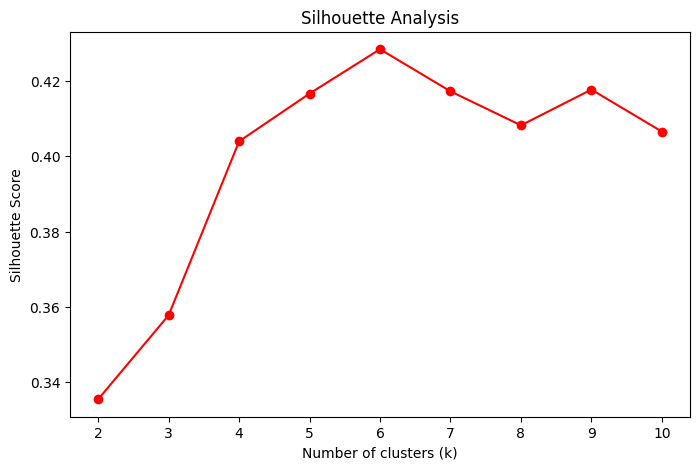

In [17]:
 ## Silhouette Score Analysis

# %% [code]
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_scores, "ro-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


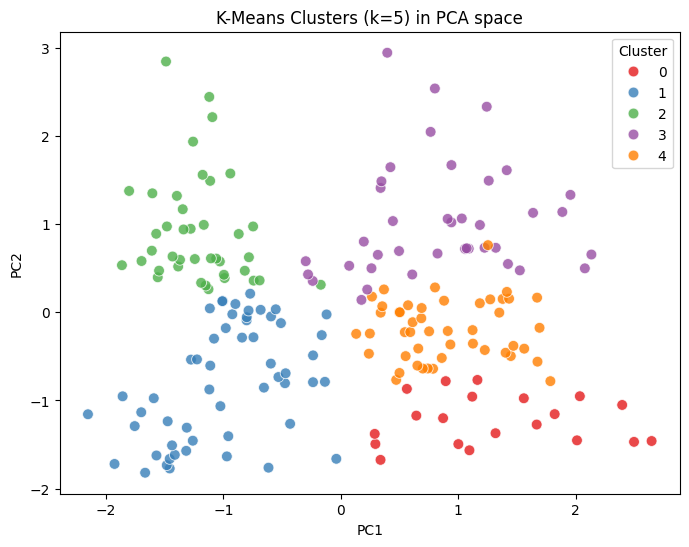

In [20]:
# ## Apply K-Means with Optimal K

# %% [code]
# Let's assume optimal K from Elbow and Silhouette (often 5 for this dataset)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = labels
df.head()

# Visualize clusters in PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1", s=60, alpha=0.8)
plt.title(f"K-Means Clusters (k={optimal_k}) in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [21]:
# ## Cluster Analysis

# %% [code]
# Cluster centroids (in original feature space)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(centroids, columns=X.columns)
cluster_summary["Cluster"] = range(optimal_k)
cluster_summary

# %% [code]
# Mean values of features per cluster
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.250000,26.750000,18.350000
1,25.185185,41.092593,62.240741
2,32.875000,86.100000,81.525000
3,39.871795,86.102564,19.358974
4,55.638298,54.382979,48.851064


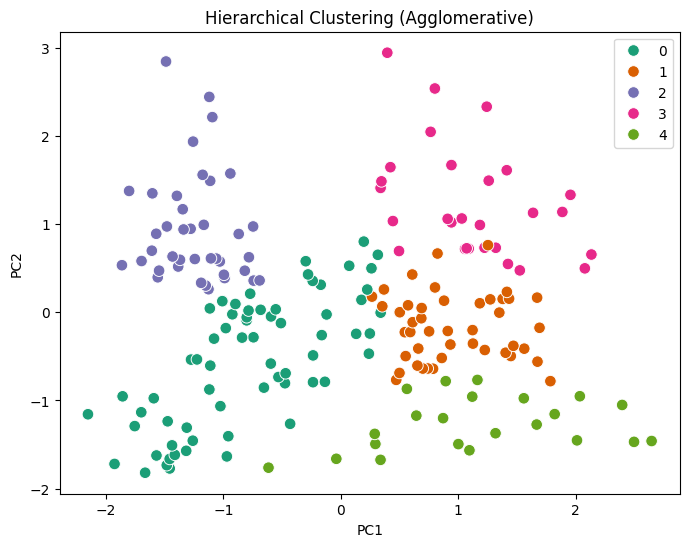

In [30]:
# Compare with Other Clustering Algorithms

# %% [code]
# Hierarchical Clustering (Agglomerative)
# Hierarchical Clustering (Agglomerative)
hc = AgglomerativeClustering(n_clusters=optimal_k)
hc_labels = hc.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hc_labels, palette="Dark2", s=70)
plt.title("Hierarchical Clustering (Agglomerative)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


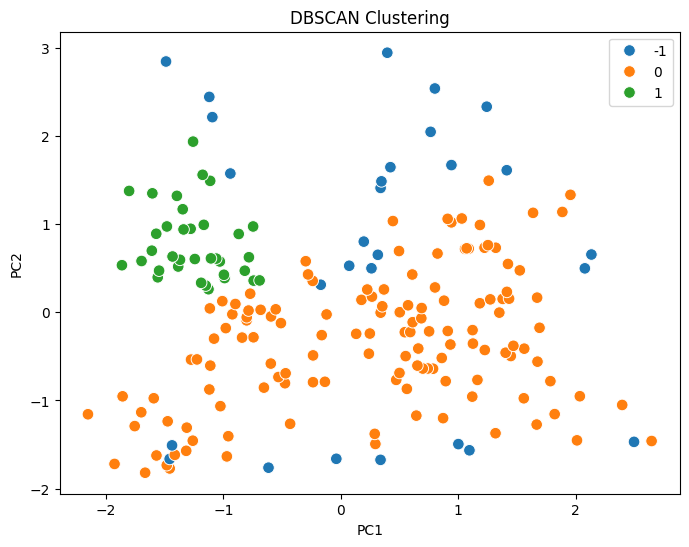

In [33]:
# DBSCAN (density-based clustering)
dbscan = DBSCAN(eps=0.6, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_labels, palette="tab10", s=70)
plt.title("DBSCAN Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [34]:
# ## K-Means with Random Init vs K-Means++

# %% [code]
kmeans_random = KMeans(n_clusters=5, init="random", n_init=10, random_state=42)
kmeans_plus = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)

labels_random = kmeans_random.fit_predict(X_scaled)
labels_plus = kmeans_plus.fit_predict(X_scaled)

print("Inertia (random init):", kmeans_random.inertia_)
print("Inertia (k-means++):", kmeans_plus.inertia_)

# Compare Silhouette
print("Silhouette (random init):", silhouette_score(X_scaled, labels_random))
print("Silhouette (k-means++):", silhouette_score(X_scaled, labels_plus))


Inertia (random init): 168.24758017556834
Inertia (k-means++): 168.24758017556834
Silhouette (random init): 0.41664341513732767
Silhouette (k-means++): 0.41664341513732767


In [41]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# MiniBatch K-Means
mini_kmeans = MiniBatchKMeans(n_clusters=5, batch_size=32, random_state=42)
mini_labels = mini_kmeans.fit_predict(X_scaled)

print("Inertia (MiniBatchKMeans):", mini_kmeans.inertia_)
print("Silhouette (MiniBatchKMeans):", silhouette_score(X_scaled, mini_labels))

# Evaluation Function
def evaluate_clustering(X, labels):
    print("Silhouette Score:", silhouette_score(X, labels))
    print("Davies-Bouldin Index (lower better):", davies_bouldin_score(X, labels))
    print("Calinski-Harabasz Score (higher better):", calinski_harabasz_score(X, labels))

print("\n=== Evaluation of KMeans++ ===")
evaluate_clustering(X_scaled, labels_plus)

print("\n=== Evaluation of MiniBatchKMeans ===")
evaluate_clustering(X_scaled, mini_labels)


Inertia (MiniBatchKMeans): 186.14426455633512
Silhouette (MiniBatchKMeans): 0.3470390065161773

=== Evaluation of KMeans++ ===
Silhouette Score: 0.41664341513732767
Davies-Bouldin Index (lower better): 0.874551051002418
Calinski-Harabasz Score (higher better): 125.10094020060954

=== Evaluation of MiniBatchKMeans ===
Silhouette Score: 0.3470390065161773
Davies-Bouldin Index (lower better): 1.122580246845169
Calinski-Harabasz Score (higher better): 110.36983799339141


In [42]:
# ##  Evaluation Metrics Beyond Silhouette

# %% [code]
def evaluate_clustering(X, labels):
    print("Silhouette Score:", silhouette_score(X, labels))
    print("Davies-Bouldin Index (lower better):", davies_bouldin_score(X, labels))
    print("Calinski-Harabasz Score (higher better):", calinski_harabasz_score(X, labels))

print("\n=== Evaluation of KMeans++ ===")
evaluate_clustering(X_scaled, labels_plus)


=== Evaluation of KMeans++ ===
Silhouette Score: 0.41664341513732767
Davies-Bouldin Index (lower better): 0.874551051002418
Calinski-Harabasz Score (higher better): 125.10094020060954


Inertias over runs: [168.24758017556834, 168.24758017556834, 168.24758017556834, 168.24758017556834, 168.24758017556834]
Silhouette Scores over runs: [0.41664341513732767, 0.41664341513732767, 0.41664341513732767, 0.41664341513732767, 0.41664341513732767]


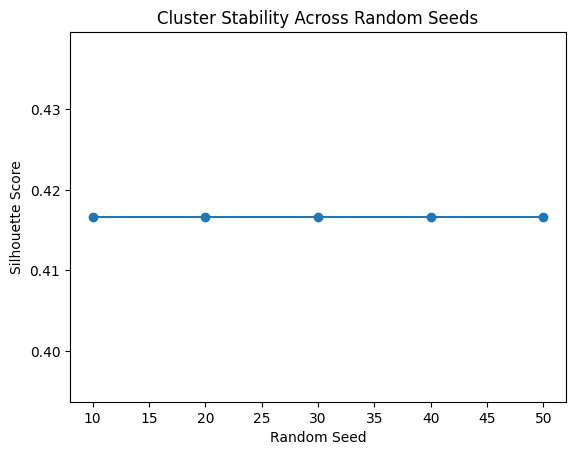

In [43]:
# ## 5. Cluster Stability (Multiple Runs)

# %% [code]
inertias = []
sil_scores = []
for seed in range(10, 60, 10):
    km = KMeans(n_clusters=5, random_state=seed, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

print("Inertias over runs:", inertias)
print("Silhouette Scores over runs:", sil_scores)

plt.plot(range(10, 60, 10), sil_scores, marker="o")
plt.title("Cluster Stability Across Random Seeds")
plt.xlabel("Random Seed")
plt.ylabel("Silhouette Score")
plt.show()


In [44]:
# ## Compare with Other Algorithms

# %% [code]
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(X_scaled)

print("\n=== Hierarchical Clustering ===")
evaluate_clustering(X_scaled, hc_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

print("\n=== DBSCAN ===")
# DBSCAN may produce noise points (-1 label), so handle carefully
unique_labels = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("Clusters found:", unique_labels)

# If DBSCAN found valid clusters
if unique_labels > 1:
    evaluate_clustering(X_scaled, db_labels)



=== Hierarchical Clustering ===
Silhouette Score: 0.39002826186267214
Davies-Bouldin Index (lower better): 0.9162886109753661
Calinski-Harabasz Score (higher better): 107.82656032570374

=== DBSCAN ===
Clusters found: 2
Silhouette Score: 0.18803828359177516
Davies-Bouldin Index (lower better): 2.479937262269012
Calinski-Harabasz Score (higher better): 28.734652101192907


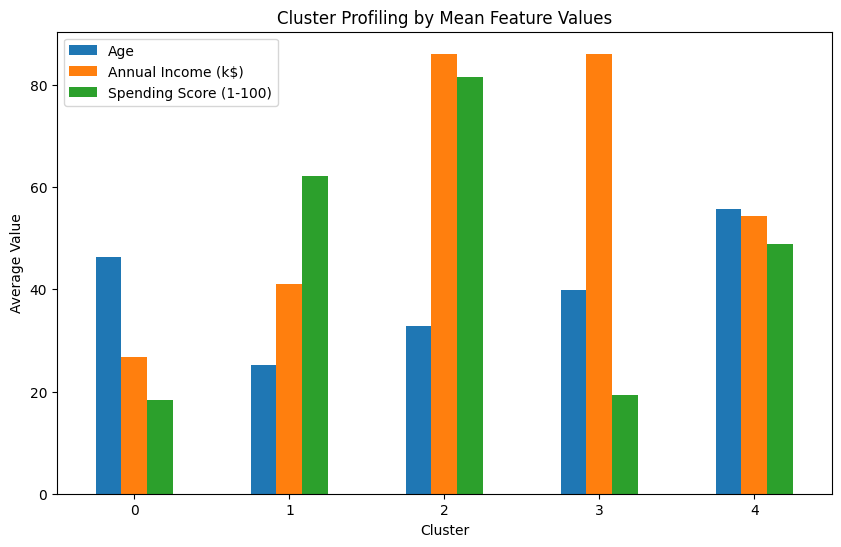

In [45]:
# ##  Cluster Profiling (Business Insights)

# %% [code]
df["Cluster"] = labels_plus
cluster_profile = df.groupby("Cluster")[features].mean().round(2)
cluster_profile["Count"] = df["Cluster"].value_counts().sort_index().values
cluster_profile

# %% [code]
# Visualization of profiles
cluster_profile[features].plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiling by Mean Feature Values")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()